# Imports

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection

import sklearn.neighbors
import sklearn.metrics

# Reading Data and making X and y

In [4]:
data = pd.read_csv('./titanic.csv')

X = data.drop(columns=['Survived', 'Name', 'Ticket', 'PassengerId', 'Cabin', 'Embarked', 'SibSp', 'Parch', 'Fare'])
for i in X['Sex']:
    if i == 'male':
        i = 1
    else:
        i = 0
#


X = X.dropna()
X['Sex'] = X['Sex'].apply(lambda x: 1 if x == 'male' else 0)

y = data[['Pclass', 'Sex', 'Age', 'Survived']]
y = y.dropna()
y = y['Survived']
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking to ensure no null values

In [5]:
print('Pclass: ', X['Pclass'].isnull().values.any())
print('Sex: ', X['Sex'].isnull().values.any())
print('Age: ', X['Age'].isnull().values.any())
data


Pclass:  False
Sex:  False
Age:  False


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [36]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 7)

test = knn.fit(X_train, y_train)

In [37]:
#knn.predict(X_test)[0:5]

# What percentage did we get right?

In [38]:
knn.score(X_test, y_test)

0.7622377622377622

# Making Confusion Matricies

In [39]:
y_pred = knn.predict(X_test)
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[77,  8],
       [26, 32]], dtype=int64)

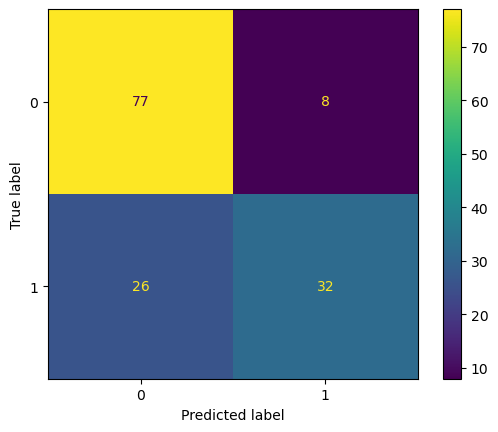

In [40]:
matrix = sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(y_test, y_pred))
matrix.plot()
#matrix.ax_.set_title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')


In [10]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        85
           1       0.79      0.71      0.75        58

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



In [11]:
knn_cv = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

cv_scores = sklearn.model_selection.cross_val_score(knn_cv, X, y, cv=5)
np.mean(cv_scores)

0.7605436816704423

In [12]:
knn2 = sklearn.neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1,25)}
knn_gscv = sklearn.model_selection.GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [13]:
knn_gscv.best_params_

{'n_neighbors': 5}

In [14]:
knn_gscv.best_score_

0.7605436816704423

# The reason I will never use matplotlab again

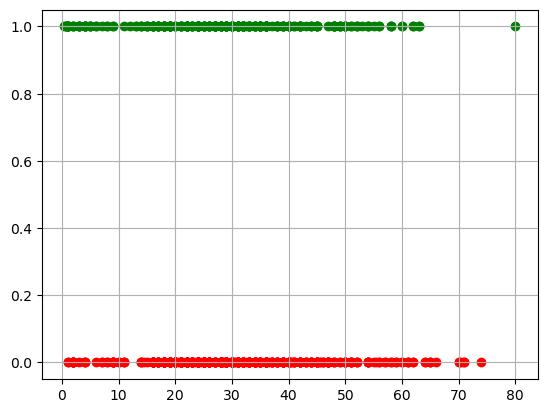

In [15]:
x_axis = X[['Sex']]
y_axis = X[['Age']]

#df = pd.DataFrame
sex_as_num = data['Sex'].apply(lambda x: 1 if x == 'male' else 0)
Survive_as_color = data['Survived'].apply(lambda x: 'green' if x == 1 else 'red')
#plt.scatter(x_axis, y_axis, c=y, cmap='Greens', s=200, marker='o')

for i in range(len(data)):
    plt.scatter(data['Age'][i], data['Survived'][i], c=Survive_as_color[i])

plt.grid()

# Seaborn graphing


In [42]:
import seaborn as sns

C:\Users\ashto\AppData\Local\Temp\ipykernel_19936\130793123.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph.Sex = graph.Sex.map({'male': 1, 'female': 0})


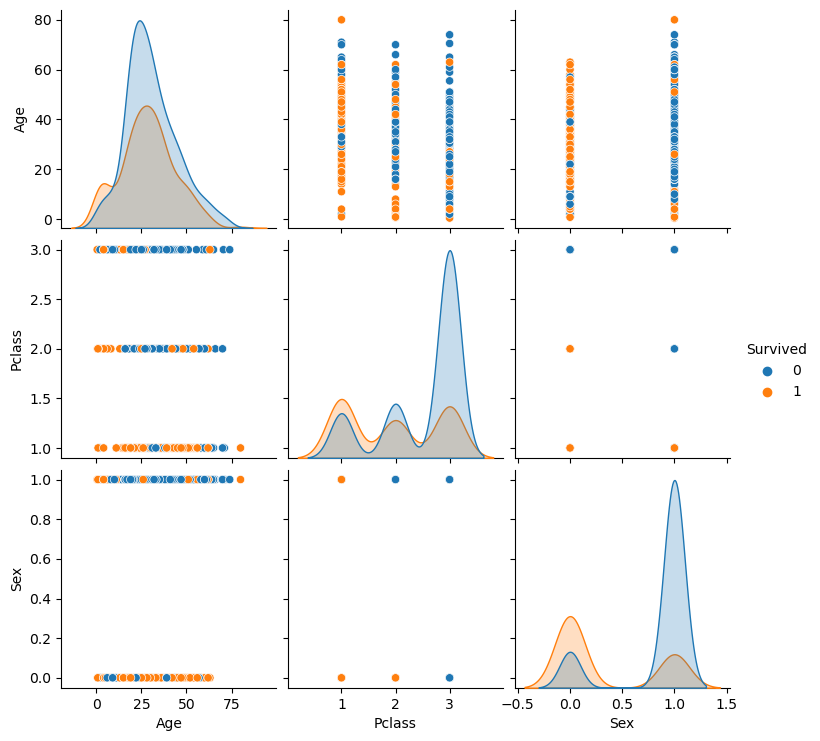

In [43]:
sex = pd.DataFrame(data['Sex'].apply(lambda x: 1 if x == 'male' else 0))
graph = data[['Age', 'Pclass', 'Sex', 'Survived']]
graph.Sex = graph.Sex.map({'male': 1, 'female': 0})
sns.pairplot(graph, hue='Survived')




In [18]:
graph

,Age,Pclass,Sex,Survived
0,22.0,3,1,0
1,38.0,1,0,1
2,26.0,3,0,1
3,35.0,1,0,1
4,35.0,3,1,0
...,...,...,...,...
886,27.0,2,1,0
887,19.0,1,0,1
888,NaN,3,0,0
889,26.0,1,1,1


# Gaussian Naive Bayes Test

In [54]:
from sklearn.naive_bayes import GaussianNB
gNB = GaussianNB()
gNB.fit(X_train, y_train)
y_gNB = gNB.predict(X_test)

In [55]:
matrix = sklearn.metrics.confusion_matrix(y_test, y_gNB)
#matrix.ax_.set_title('Confusion Matrix')
#plt.xlabel('Predicted')
#plt.ylabel('True')
matrix

array([[72, 13],
       [17, 41]], dtype=int64)

In [56]:
print(sklearn.metrics.classification_report(y_test, y_gNB))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        85
           1       0.76      0.71      0.73        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143

